In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

In [2]:
from selenium import webdriver

In [3]:
CLASS_ID = 15
BATCH_ID = "CS 14"

In [39]:
try:
    driver = webdriver.Firefox()
except:
    driver = webdriver.Chrome()

In [40]:
url = "http://www.ncuindia.edu/timetable/cse2019.html"
driver.get(url)

In [41]:
headers = driver.find_elements_by_tag_name("h1")

In [42]:
headers = list(map(lambda x: x.text, headers))

In [43]:
table = driver.find_elements_by_tag_name("table")[CLASS_ID]

In [44]:
tbody = table.find_element_by_tag_name("tbody")

In [53]:
i, j, k = 0, 0, 0
days = {}
for row in tbody.find_elements_by_tag_name("tr"):
    lr = []
    j = 0
    for col in row.find_elements_by_tag_name("td"):
        if (j > 0) and (i > 0):
            if ((i % 2) is 0):
                lr.append(col.text)
        j += 1
    lr = list(map(lambda x: list(filter(lambda y: (len(y) > 0) and (y is not " "), x.split("\n"))), lr))
    lr = list(filter(lambda z: (len(z) > 2), lr))
    lr = list(filter(lambda z: (z[3] == BATCH_ID), lr))
#     lr = list(map(lambda a: (a[:3]+a[4:]) if (len(a) == 5) else list(a), list(filter(lambda z: (len(z) > 2) or ((len(z) > 5) and (z[3] == BATCH_ID)), list(map(lambda x: list(filter(lambda y: (len(y) > 0) and (y is not " "), x.split("\n"))), lr))))))
    print(lr)
#     if len(lr) > 0:
#         days[k] = {sub[3] : str(sub[0] + " in " + sub[2]) for sub in lr}
#         k += 1
    i += 1

TypeError: filter expected 2 arguments, got 1

In [30]:
driver.close()

In [31]:
df = pd.DataFrame(days)

In [32]:
df = df.T

In [33]:
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

In [34]:
df.fillna("BREAK", inplace=True)

In [35]:
index = ["MON", "TUE", "WED", "THU", "FRI"]

In [36]:
df.index = index

In [37]:
df = df.reset_index()
df.rename(columns={"index" : "Days"}, inplace=True)
df

,Days,8:30 am - 9:20 am,9:30 am - 10:20 am,10:30 am - 11:20 am,11:30 am - 12:20 pm,12:30 pm - 1:20 pm,1:30 pm - 2:20 pm,2:30 pm - 3:20 pm,3:30 pm - 4:20 pm
0,MON,BREAK,ES in RN 222,IS&C in RN 127,DM&W in RN 141.,ES in RN 210,ES in RN 210,BREAK,BREAK
1,TUE,AI in RN 227,AI in RN 227,IS&C in RN 222,SE in RN 031,BREAK,ES in RN 222,DM&W in RN 137,DM&W in RN 137
2,WED,BREAK,ES in RN 141.,SE in RN 030,BREAK,AI in RN 133,AI in RN 133,AI in RN 133,AI in RN 133
3,THU,SE in RN 135,SE in RN 135,CTC in RN 222,CTC in RN 222,IS&C in RN 117,BREAK,BREAK,BREAK
4,FRI,DM&W in RN 102,IS&C in RN 124,IS&C in RN 124,ES in RN 127,BREAK,SE in RN 141.,BREAK,BREAK


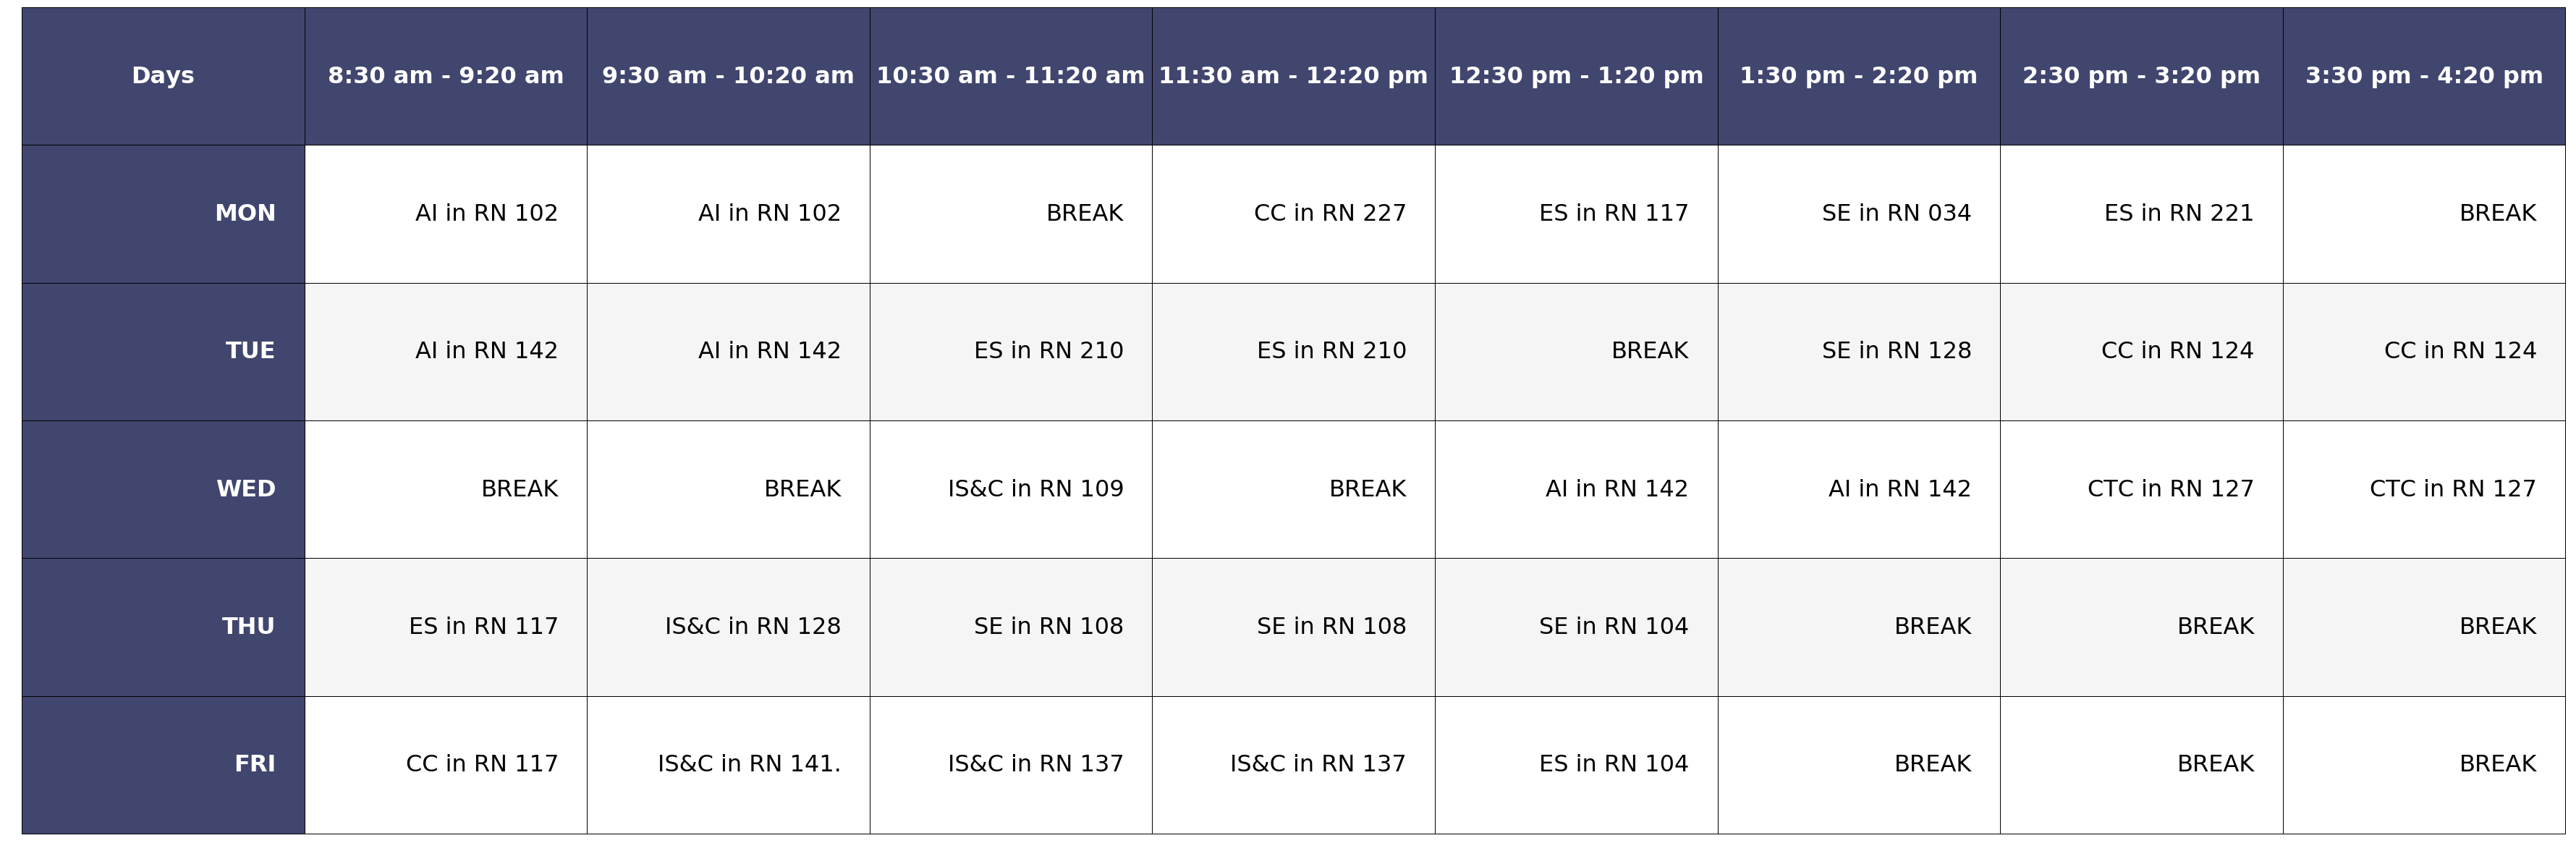

In [31]:
def render_mpl_table(data, col_width=3.0, row_height=3.5, font_size=32,
                     header_color='#40466e', row_colors=['#f5f5f5', 'w'], edge_color='black',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=1, col_width=7).get_figure().savefig("TimeTable.png", dpi=200)